# Machine Learning Project

## Patient Survival Prediction

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import joblib



# Upload dataset file

In [ ]:
hospital_data = pd.read_csv('dataset.csv')

# Read the data

In [ ]:
X = hospital_data.drop(columns=['hospital_death'])
y = hospital_data['hospital_death']

# Preparing the dataset

##      - Handling empty cells if any

####       - Check if contains null or missing values

In [ ]:
hospital_data.isnull().any()

age                  False
bmi                  False
elective_surgery     False
gender               False
height               False
weight               False
d1_diasbp_max        False
d1_diasbp_min        False
d1_heartrate_max     False
d1_heartrate_min     False
d1_mbp_max           False
d1_mbp_min           False
d1_resprate_max      False
d1_resprate_min      False
d1_temp_max          False
d1_temp_min          False
h1_heartrate_max     False
h1_heartrate_min     False
h1_mbp_max           False
h1_mbp_min           False
h1_resprate_max      False
h1_resprate_min      False
d1_glucose_max       False
d1_glucose_min       False
d1_potassium_max     False
d1_potassiu1_min     False
aids                 False
cirrhosis            False
diabetes_mellitus    False
hospital_death       False
dtype: bool

#### - Display sum of null or missing values


In [ ]:
hospital_data.isnull().sum()

age                  0
bmi                  0
elective_surgery     0
gender               0
height               0
weight               0
d1_diasbp_max        0
d1_diasbp_min        0
d1_heartrate_max     0
d1_heartrate_min     0
d1_mbp_max           0
d1_mbp_min           0
d1_resprate_max      0
d1_resprate_min      0
d1_temp_max          0
d1_temp_min          0
h1_heartrate_max     0
h1_heartrate_min     0
h1_mbp_max           0
h1_mbp_min           0
h1_resprate_max      0
h1_resprate_min      0
d1_glucose_max       0
d1_glucose_min       0
d1_potassium_max     0
d1_potassiu1_min     0
aids                 0
cirrhosis            0
diabetes_mellitus    0
hospital_death       0
dtype: int64

##   - Spliting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Buliding Models

## Logistic Regression Model algorithms

In [ ]:
LR_Model = LogisticRegression(random_state=44, max_iter=10000)
LR_Model.fit(X_train, y_train)
LR_Predictions = LR_Model.predict(X_test)

LR_Score=round(LR_Model.score(X_train, y_train),10)

LR_ScoreTest=round(LR_Model.score(X_test, y_test),10)

print('LogisticRegression Score: ', LR_Score)
print('LogisticRegression Test Score: ', LR_ScoreTest)

LR_Accuracy = accuracy_score(y_test, LR_Predictions)
print("Accuracy: ", LR_Accuracy)

LogisticRegression Score:  0.9169960474
LogisticRegression Test Score:  0.9176797688
Accuracy:  0.9176797688491523


## Logistic Regression Model visualization

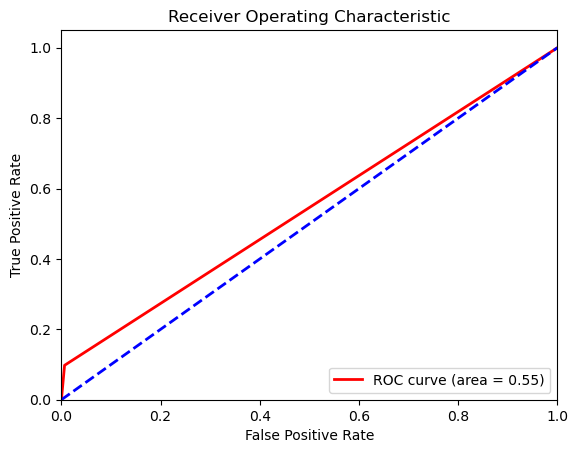

In [ ]:
LR_FPR, LR_TPR, thresholds_lr = roc_curve(y_test, LR_Predictions)
LR_ROC_Auc = auc(LR_FPR, LR_TPR)

plt.plot(LR_FPR, LR_TPR, color='red', lw=2, label='ROC curve (area = %0.2f)' % LR_ROC_Auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression Model evaluation

In [ ]:
LR_Score=round(LR_Model.score(X_train, y_train),10)
LR_ScoreTest=round(LR_Model.score(X_test, y_test),10)
print('Random Forest Score: ', LR_Score)
print('Random Forest Test Score: ', LR_ScoreTest)

Random Forest Score:  0.9169960474
Random Forest Test Score:  0.9176797688


## DecisionTree Model algorithms

In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predictions = DT_Model.predict(X_test)

DT_Score=round(DT_Model.score(X_train, y_train),10)

DT_ScoreTest=round(DT_Model.score(X_test, y_test),10)

print('DecisionTree Score: ', DT_Score)
print('DecisionTree Test Score: ', DT_ScoreTest)

DT_Accuracy = accuracy_score(y_test, DT_Predictions)
print("Accuracy: ", DT_Accuracy)



DecisionTree Score:  1.0
DecisionTree Test Score:  0.8696505479
Accuracy:  0.8696505478929292


## DecisionTree Model visualization

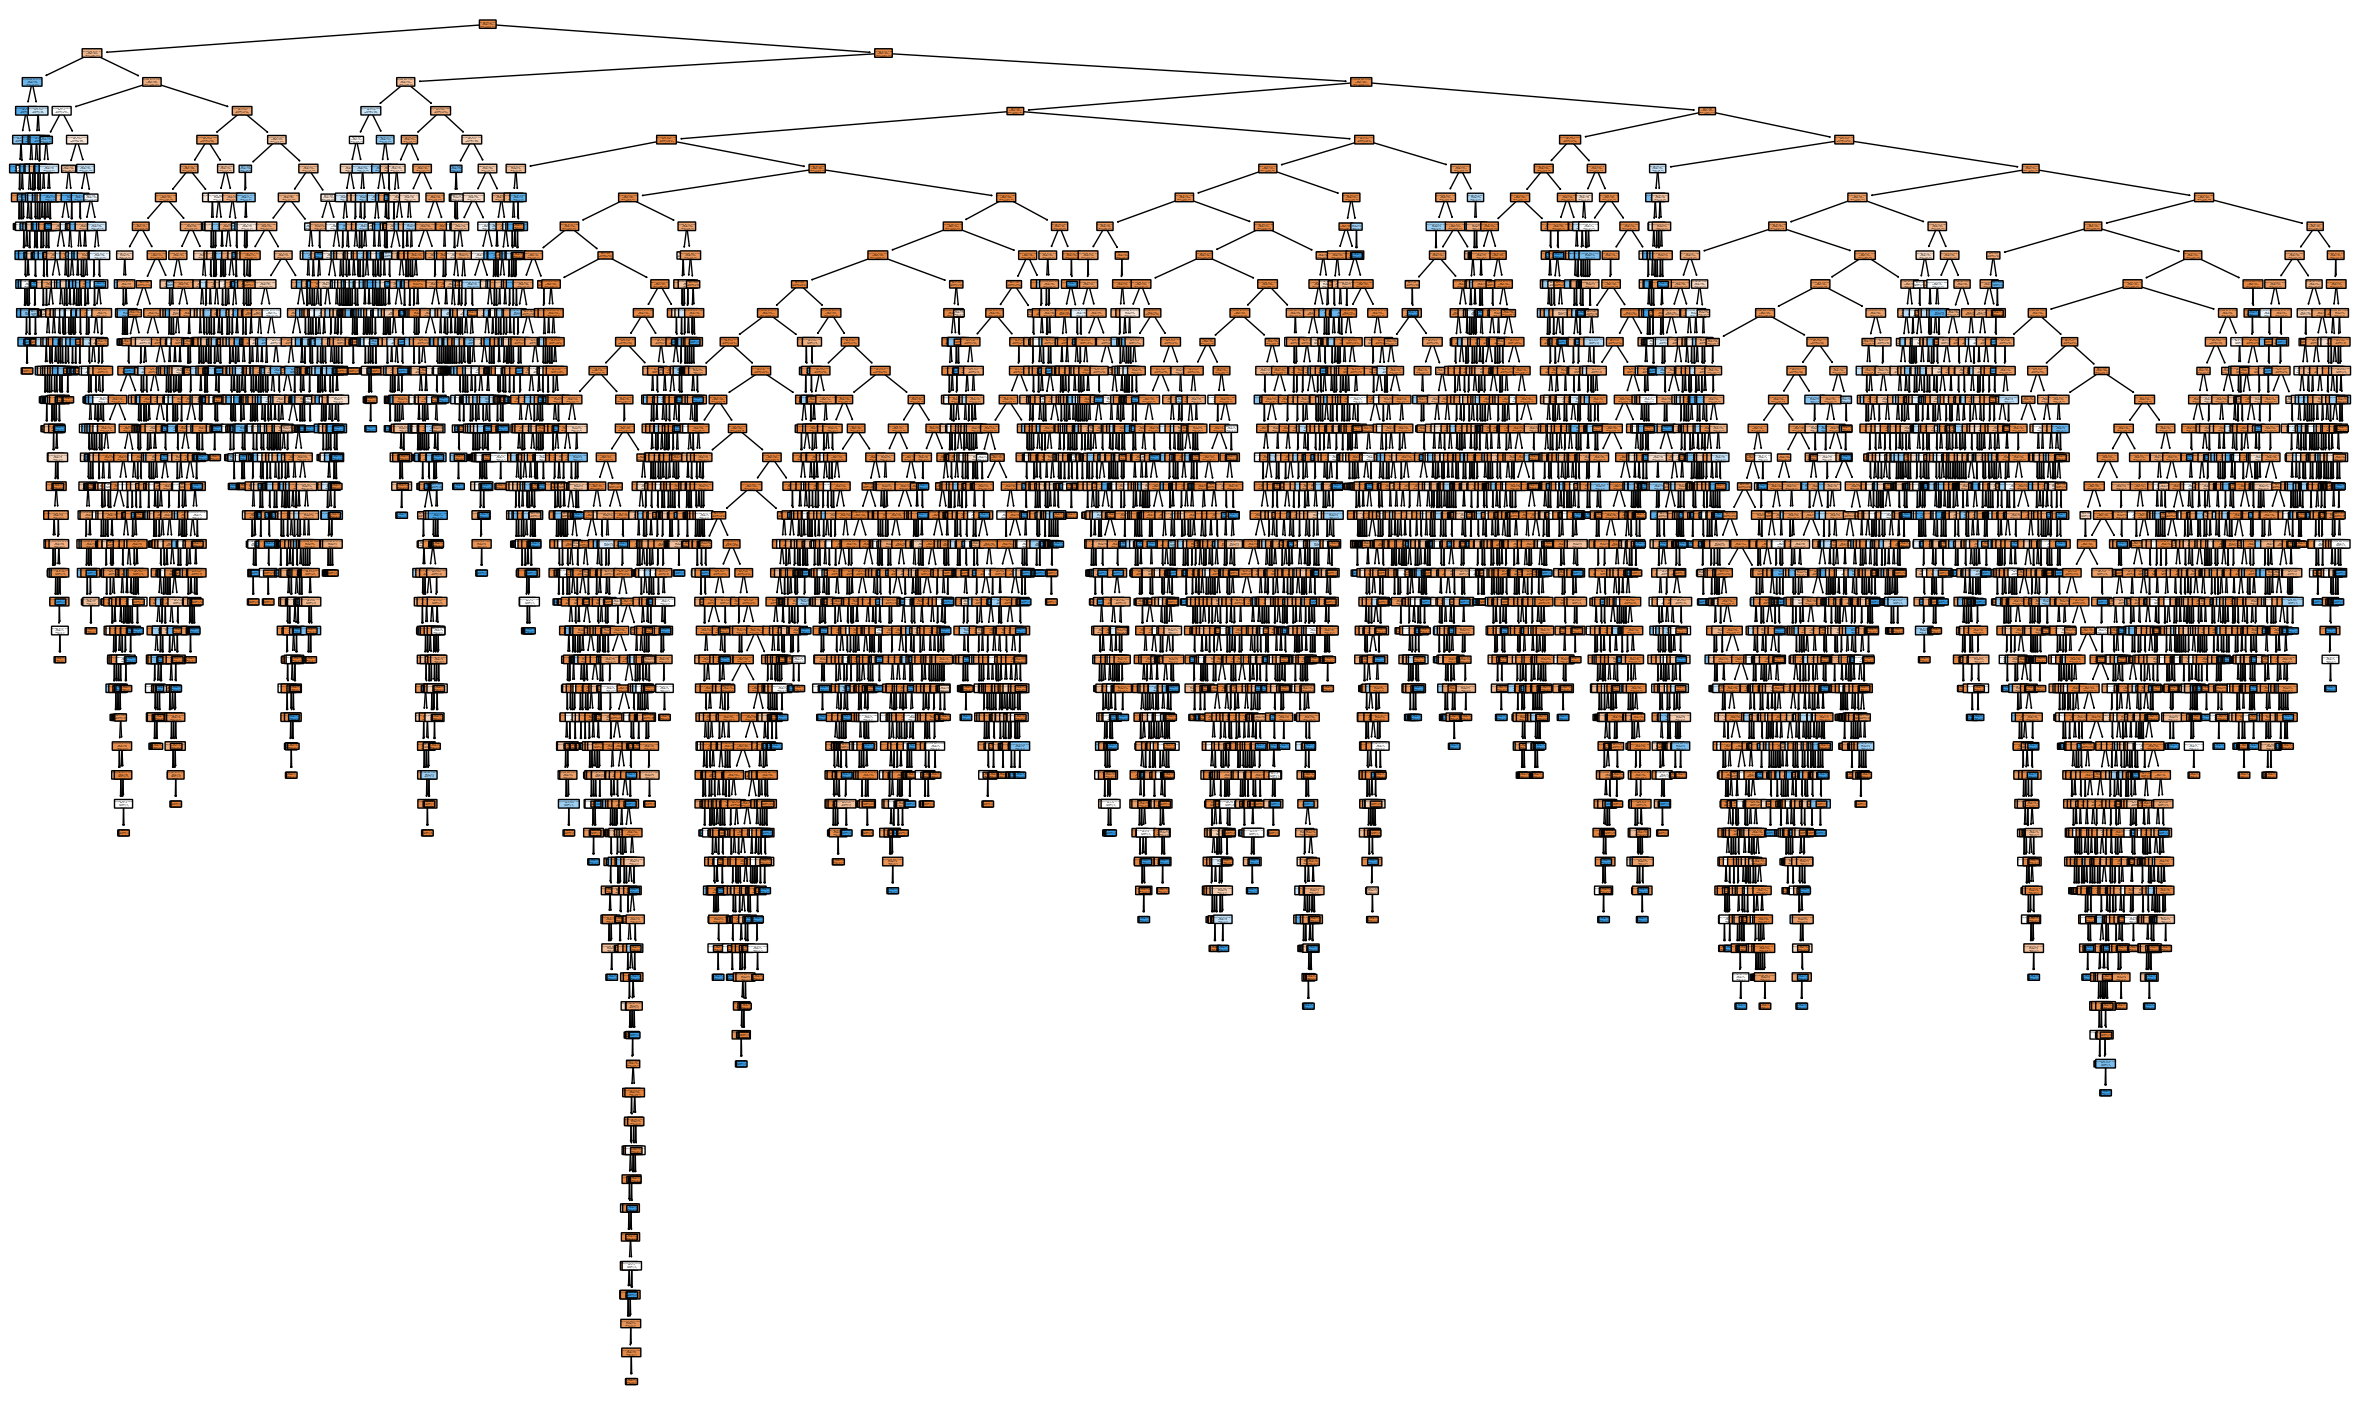

In [ ]:
# Convert class labels to string
class_names = ['0', '1']

# Plot the decision tree
plt.figure(figsize=(30, 18))
plot_tree(DT_Model, filled=True, rounded=True, feature_names=X_train.columns, class_names=class_names)
plt.show()


## DecisionTree Model evaluation

In [ ]:
DT_Score=round(DT_Model.score(X_train, y_train),10)
DT_ScoreTest=round(DT_Model.score(X_test, y_test),10)
print('Random Forest Score: ', DT_Score)
print('Random Forest Test Score: ', DT_ScoreTest)

Random Forest Score:  1.0
Random Forest Test Score:  0.8696505479


## RandomForest Model algorithms

In [ ]:
RF_Model = RandomForestClassifier(n_estimators=100, random_state=44)
RF_Model.fit(X_train, y_train)
RF_Predictions = RF_Model.predict(X_test)

RF_Score=round(RF_Model.score(X_train, y_train),10)


RF_ScoreTest=round(RF_Model.score(X_test, y_test),10)
print('RandomForest Score: ', RF_Score)
print('RandomForest Test Score: ', RF_ScoreTest)

RF_Accuracy = accuracy_score(y_test, RF_Predictions)
print("Accuracy: ", RF_Accuracy)

RandomForest Score:  0.9999863705
RandomForest Test Score:  0.9228588562
Accuracy:  0.9228588562394374


## RandomForest Model visualization

### - Plot ROC curve

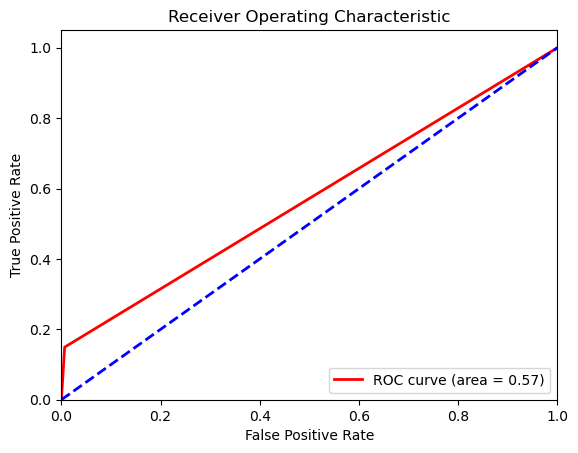

In [ ]:
RF_FPR, RF_TPR, thresholds = roc_curve(y_test, RF_Predictions)
RF_ROC_Auc = auc(fpr, tpr)

plt.plot(RF_FPR, RF_TPR, color='red', lw=2, label='ROC curve (area = %0.2f)' % RF_ROC_Auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Feature Names')

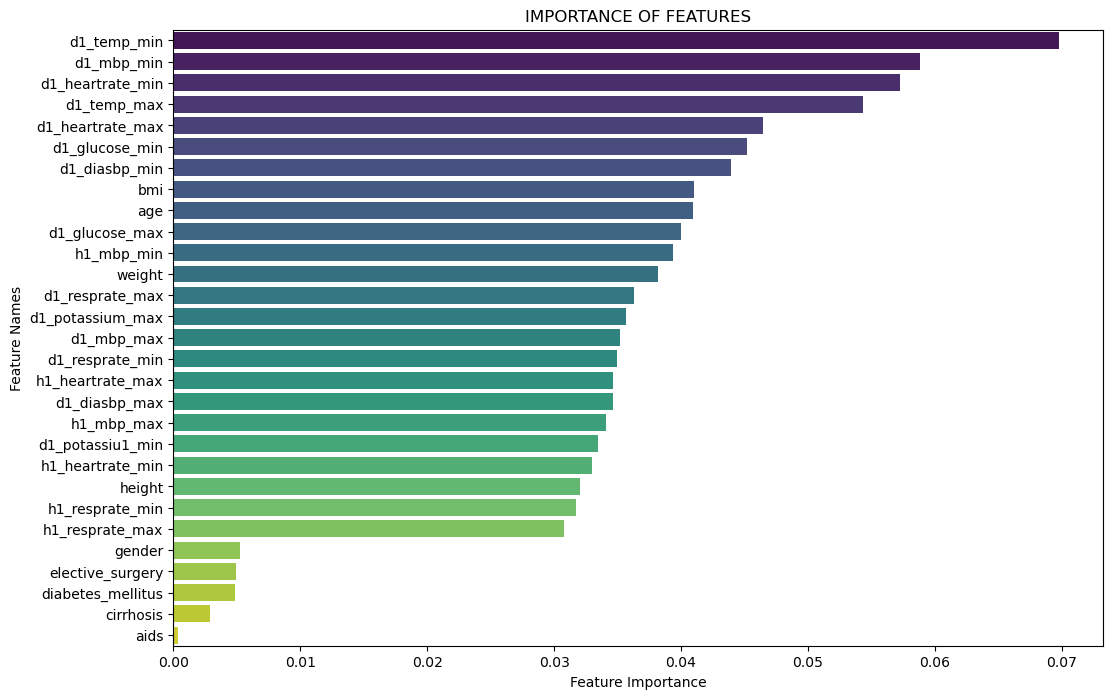

In [ ]:
# Creating arrays to store feature names and  feature importance values.
feature_importance = np.array(RF_Model.feature_importances_)
feature_names = np.array(X_train.columns)

# Constructing a DataFrame using a dictionary.
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)

# Sorting the DataFrame in descending order of feature importance.
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Setting the size of the bar plot.
plt.figure(figsize=(12, 8))

# Creating a Seaborn bar chart.
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette='viridis')

# Adding labels to the chart.
plt.title('IMPORTANCE OF FEATURES')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

## RandomForest Model evaluation

### - Compare train and test set

In [ ]:
RF_Score=round(RF_Model.score(X_train, y_train),10)
RF_ScoreTest=round(RF_Model.score(X_test, y_test),10)
print('Random Forest Score: ', RF_Score)
print('Random Forest Test Score: ', RF_ScoreTest)

Random Forest Score:  0.9999863705
Random Forest Test Score:  0.9228588562


# All Models evaluation

In [ ]:
Models = pd.DataFrame({
    'Model': [  'Logistic Regression','Decision Tree','Random Forest'],
    'Score': [  LR_Score, DT_Score,RF_Score],
    'Test Score': [ LR_ScoreTest, DT_ScoreTest,RF_ScoreTest],
    'Accuracy':[LR_Accuracy,DT_Accuracy,RF_Accuracy]})
Models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score,Accuracy
2,Random Forest,0.999986,0.922859,0.922859
0,Logistic Regression,0.916996,0.917680,0.917680
1,Decision Tree,1.000000,0.869651,0.869651


# Save the best model

In [ ]:
Fitted_RF_Model = RF_Model.fit(X_train, y_train)
filename = "Patient_Survival_Model.sav"
pk.dump(Fitted_RF_Model, open(filename, 'wb'))

# Predicting
> Example

In [ ]:
input_data = [[39, 37.7, 1, 1, 176, 117, 89, 59, 109, 79, 115, 55, 29, 7, 41, 29, 119, 91, 89, 63, 24, 15, 139, 100, 4.3, 3.8, 0, 0, 1]]

In [ ]:
Prediction_Model = joblib.load('Patient_Survival_Model.sav')
predictions = Prediction_Model.predict(input_data)
predictions

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)